## Linear Discriminant Analysis (LDA)

A feauture extraction, dimensionality reduction and supervised classification technique

- based in statistics it finds linear combinations of features that best separate two or more classes in a dataset while maximizing the between-class variance and minimizing the within-class variance

### Advantages

- reduces the number of features while retaining class discriminatory information
- reduces curse of dimensionality

### Disadvantages
- Works better when data approximates a normal distribution
- sensitive to outliers
- assumes linear relationships between features and classes

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [81]:
data = pd.read_csv('/content/Class_Seeds.csv')
data.shape

(210, 8)

In [82]:
y = data['Class']
X = data.drop('Class', axis=1)

In [83]:
# data normalization
min_max_scaler = MinMaxScaler()
scaled_data_minmax = min_max_scaler.fit_transform(X)

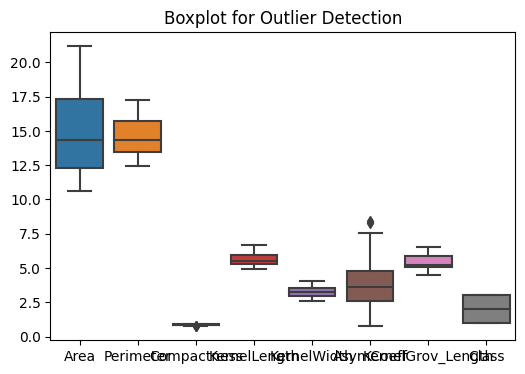

In [84]:
# Create a boxplot for outlier detection
plt.figure(figsize=(6, 4))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline LDA

In [86]:
lda_base = LinearDiscriminantAnalysis()
lda_base.fit(X_train, y_train)
y_pred_base = lda_base.predict(X_test)

In [87]:
acc_base = accuracy_score(y_test, y_pred_base)
print(f'Baseline LDA: {acc_base}')

Baseline LDA: 0.9047619047619048


### LDA with eigen solver and shrinkage

In [88]:
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', n_components=2)

good to use shrinkage/covariance_estimator when training samples are less, it can only be used with solver = eigen or lsqr

- either one of shrinkage or covariance_estimator should be used at a time

In [89]:
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [90]:
acc = accuracy_score(y_test, y_pred)
print(f'LDA ith eigen solver and shrinkage: {acc}')

LDA ith eigen solver and shrinkage: 0.9285714285714286


### LDA with svd solver and store_covariance

In [91]:
lda_ = LinearDiscriminantAnalysis(solver='svd', n_components=2, store_covariance=True, tol=0.1)

svd is default solver, store_covariance and tol can only be used with this parameter

In [92]:
lda_.fit(X_train, y_train)
y_pred_ = lda_.predict(X_test)

In [93]:
acc_ = accuracy_score(y_test, y_pred_)
print(f'LDA ith SVD solver: {acc_}')

LDA ith SVD solver: 0.9285714285714286
